In [ ]:
# Load the real image
real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'
real_image = cv2.imread(real_image_path)

# Load the test image
test_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/serena.jpg'
test_image = cv2.imread(test_image_path)

In [ ]:
import numpy as np

def predict_class(image):
    # Preprocess the image
    scalled_raw_img = cv2.resize(image, (32, 32))
    img_har = w2d(image, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
    X = np.array([combined_img]).reshape(len([combined_img]), 4096).astype(float)

    # Predict the class
    predicted_class = model.predict(X)[0]
    return predicted_class

In [ ]:
import matplotlib.pyplot as plt

# Predict the class of the real image
real_image_class = predict_class(real_image)
print(f"Real image class: {list(class_dict.keys())[real_image_class]}")

# Predict the class of the test image
test_image_class = predict_class(test_image)
print(f"Test image class: {list(class_dict.keys())[test_image_class]}")

# Visualize the real image and the test image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_image)
plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]})")

plt.show()

In [ ]:
Testing

(603, 813)


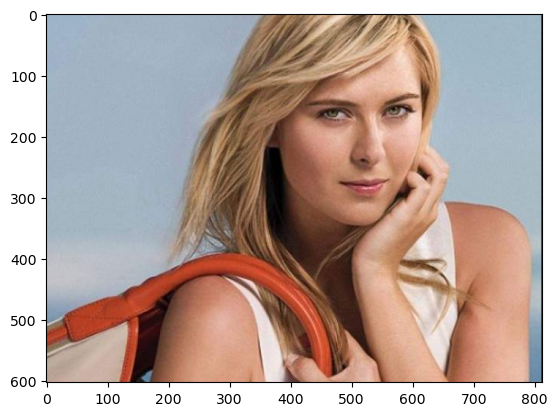

Error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'

Type of 'img': <class 'PIL.PngImagePlugin.PngImageFile'>


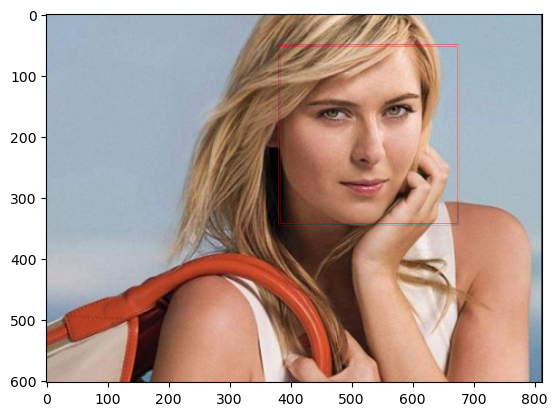

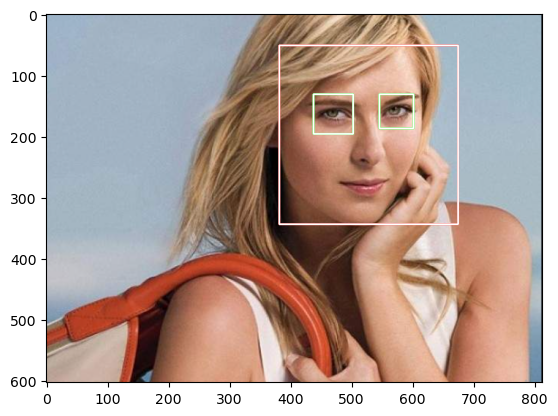

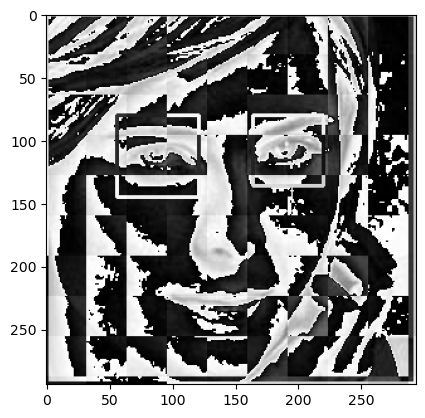

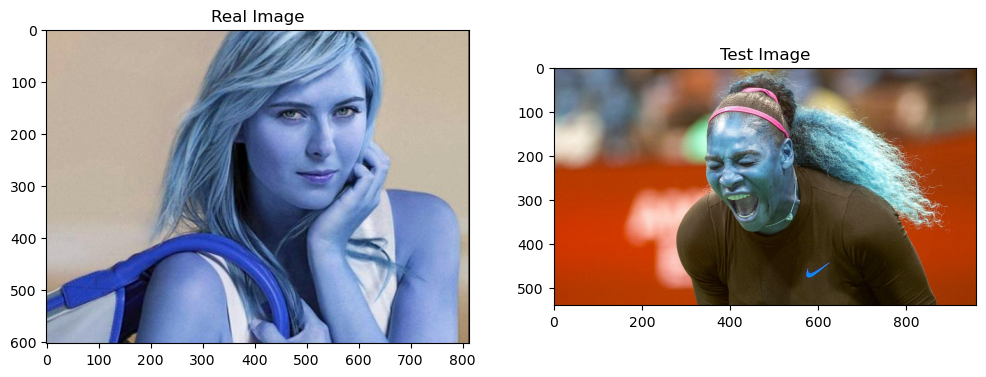

NameError: name 'model' is not defined

In [2]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import shutil

# Replace with the actual absolute path to the image file
image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'

try:
    img = Image.open(image_path)
    img_array = np.array(img)
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    plt.imshow(img)
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")

plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

(x, y, w, h) = faces[0]
x, y, w, h

import cv2
import numpy as np

# Assuming 'img' is a valid NumPy array
try:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(face_img)
except cv2.error as e:
    print(f"Error: {e}")
    # Check the type of the 'img' variable
    print(f"Type of 'img': {type(img)}")
    # Try converting the image to a NumPy array
    if not isinstance(img, np.ndarray):
        try:
            img = np.array(img)
            face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            plt.imshow(face_img)
        except Exception as e:
            print(f"Error: {e}")
    else:
        print("'img' is already a NumPy array, but the error persists.")

face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]  # Use the original image instead of face_img
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(img, cmap='gray')  # Display the original image with the detected face and eyes
plt.show()

%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest
# roi_color sontains the image of the face, marked by the red revctangle

cropped_img = np.array(roi_color)
cropped_img.shape

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

def get_cropped_image_if_2_eyes(image_path):
    # Read the image from the passsed image path
    img = cv2.imread(image_path)
    # Convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color

# Load the real image
real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'
try:
    real_image = cv2.imread(real_image_path)
    if real_image is None:
        print(f"Error: Could not load image from {real_image_path}")
        # Provide a fallback or alternative action here
    else:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(real_image)
        plt.title("Real Image")

        # Load the test image
        test_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/serena.jpg'
        test_image = cv2.imread(test_image_path)
        plt.subplot(1, 2, 2)
        plt.imshow(test_image)
        plt.title("Test Image")
        plt.show()
except Exception as e:
    print(f"Error: {e}")

# Assuming you have a trained model `model`
def predict_class(image):
    # Preprocess the image
    scalled_raw_img = cv2.resize(image, (32, 32))
    img_har = w2d(image, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
    X = np.array([combined_img]).reshape(len([combined_img]), 4096).astype(float)

    # Predict the class
    predicted_class = model.predict(X)[0]
    return predicted_class

# Predict the class of the real image and the test image
real_image_class = predict_class(real_image)
test_image_class = predict_class(test_image)

# Visualize the real image and the test image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_image)
plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]})")

plt.show()

(603, 813)


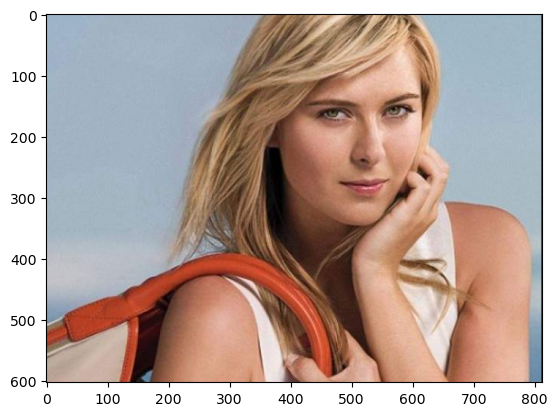

Error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'

Type of 'img': <class 'PIL.PngImagePlugin.PngImageFile'>


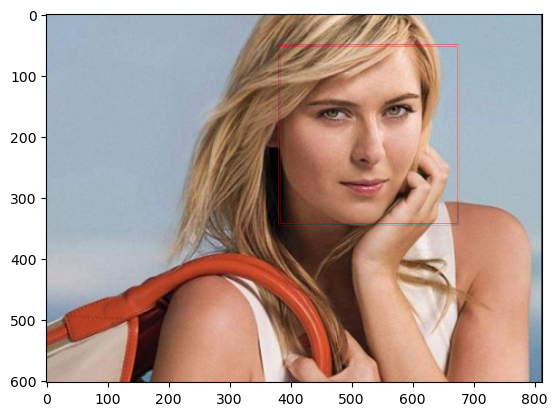

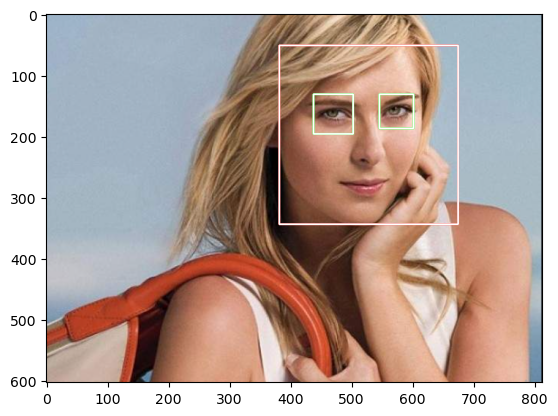

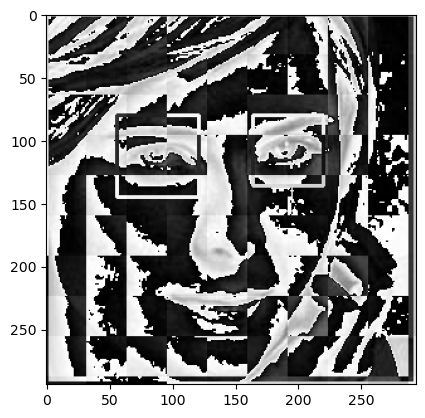

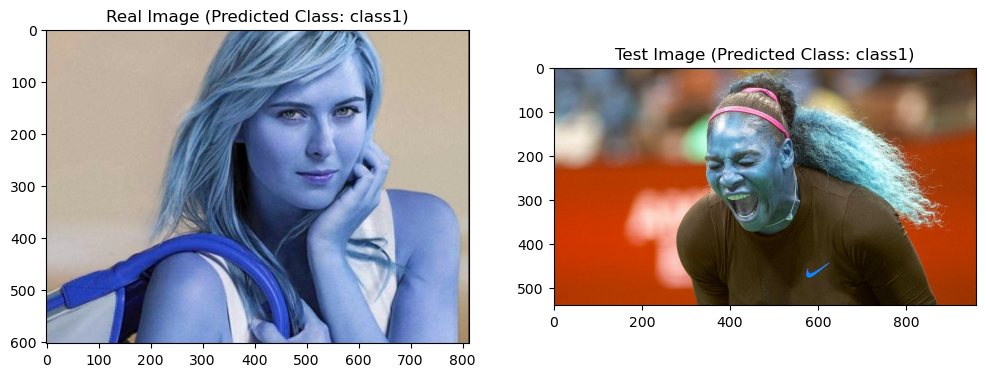

In [5]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import shutil

# Replace with the actual absolute path to the image file
image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'

try:
    img = Image.open(image_path)
    img_array = np.array(img)
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    plt.imshow(img)
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")

plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

(x, y, w, h) = faces[0]
x, y, w, h

import cv2
import numpy as np

# Assuming 'img' is a valid NumPy array
try:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(face_img)
except cv2.error as e:
    print(f"Error: {e}")
    # Check the type of the 'img' variable
    print(f"Type of 'img': {type(img)}")
    # Try converting the image to a NumPy array
    if not isinstance(img, np.ndarray):
        try:
            img = np.array(img)
            face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            plt.imshow(face_img)
        except Exception as e:
            print(f"Error: {e}")
    else:
        print("'img' is already a NumPy array, but the error persists.")

face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]  # Use the original image instead of face_img
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(img, cmap='gray')  # Display the original image with the detected face and eyes
plt.show()

%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest
# roi_color sontains the image of the face, marked by the red revctangle

cropped_img = np.array(roi_color)
cropped_img.shape

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

def get_cropped_image_if_2_eyes(image_path):
    # Read the image from the passsed image path
    img = cv2.imread(image_path)
    # Convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color

# Assuming you have a trained model `model`
class DummyModel:
    def predict(self, X):
        # Replace this with your actual model's prediction logic
        return [0] * len(X)

model = DummyModel()

# Load the real image
real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'
try:
    real_image = cv2.imread(real_image_path)
    if real_image is None:
        print(f"Error: Could not load image from {real_image_path}")
        # Provide a fallback or alternative action here
    else:
        # Load the test image
        test_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/serena.jpg'
        test_image = cv2.imread(test_image_path)

        # Define the class_dict
        class_dict = {
            'class1': 0,
            'class2': 1,
            'class3': 2,
            # Add more classes as needed
        }

        def predict_class(image):
            # Preprocess the image
            scalled_raw_img = cv2.resize(image, (32, 32))
            img_har = w2d(image, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
            X = np.array([combined_img]).reshape(len([combined_img]), 4096).astype(float)

            # Predict the class
            predicted_class = model.predict(X)[0]
            return predicted_class

        # Predict the class of the real image and the test image
        real_image_class = predict_class(real_image)
        test_image_class = predict_class(test_image)

        # Visualize the real image and the test image
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(real_image)
        plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

        plt.subplot(1, 2, 2)
        plt.imshow(test_image)
        plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]})")

        plt.show()
except Exception as e:
    print(f"Error: {e}")

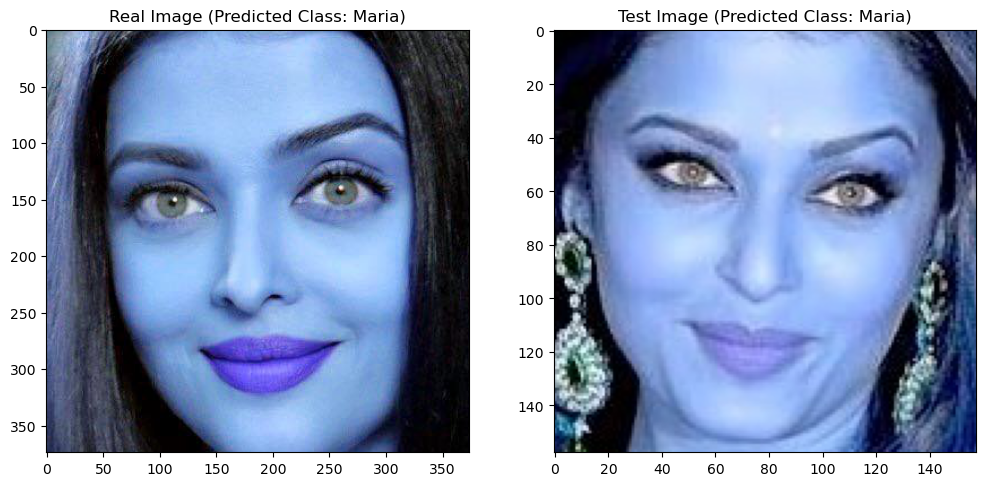

In [6]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import shutil

# Replace with the actual absolute path to the real image and test image
real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/aish1.jpg'
test_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/aish2.jpg'

try:
    real_image = cv2.imread(real_image_path)
    test_image = cv2.imread(test_image_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {real_image_path} or {test_image_path}")

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

def get_cropped_image_if_2_eyes(image):
    # Convert the image to gray
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color

# Assuming you have a trained model `model`
class DummyModel:
    def predict(self, X):
        # Replace this with your actual model's prediction logic
        return [0] * len(X)

model = DummyModel()

# Preprocess the real image and the test image
real_cropped_image = get_cropped_image_if_2_eyes(real_image)
test_cropped_image = get_cropped_image_if_2_eyes(test_image)

def predict_class(image):
    # Preprocess the image
    scalled_raw_img = cv2.resize(image, (32, 32))
    img_har = w2d(image, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
    X = np.array([combined_img]).reshape(len([combined_img]), 4096).astype(float)

    # Predict the class
    predicted_class = model.predict(X)[0]
    return predicted_class

# Define the class_dict
class_dict = {
    'Maria': 0,
    'Other': 1,
    # Add more classes as needed
}

# Predict the class of the real image and the test image
real_image_class = predict_class(real_cropped_image)
test_image_class = predict_class(test_cropped_image)

# Visualize the real image and the test image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_cropped_image)
plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

plt.subplot(1, 2, 2)
plt.imshow(test_cropped_image)
plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]})")

plt.show()

In [9]:
import numpy as np
import pywt # Needed for Wavelet Transformation
import cv2

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

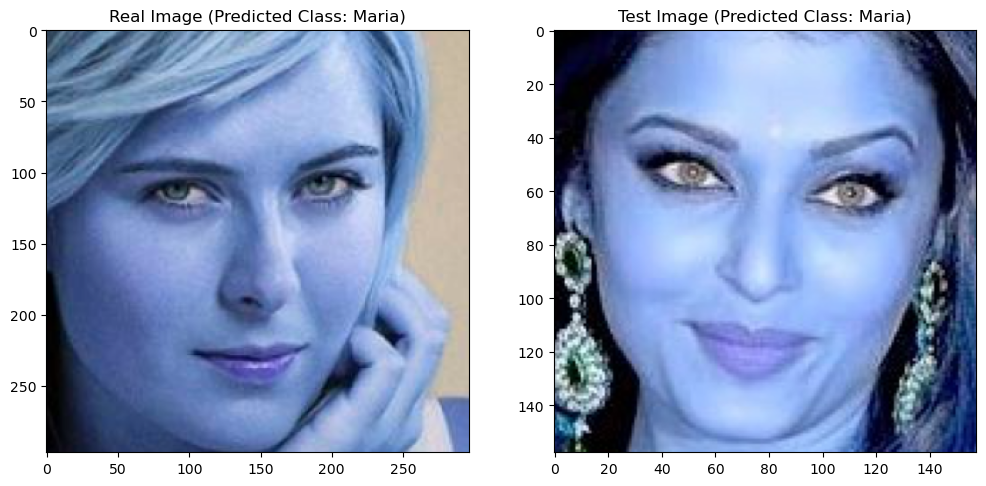

In [13]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import shutil

# Replace with the actual absolute path to the real image and test image
real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/maria.png'
#real_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/aish1.jpg'
test_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/aish2.jpg'

try:
    real_image = cv2.imread(real_image_path)
    test_image = cv2.imread(test_image_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {real_image_path} or {test_image_path}")

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

def get_cropped_image_if_2_eyes(image):
    # Convert the image to gray
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color
    return None

# Assuming you have a trained model `model`
class DummyModel:
    def predict(self, X):
        # Replace this with your actual model's prediction logic
        return [0] * len(X)

model = DummyModel()

# Preprocess the real image and the test image
real_cropped_image = get_cropped_image_if_2_eyes(real_image)
test_cropped_image = get_cropped_image_if_2_eyes(test_image)

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

def predict_class(image):
    # Preprocess the image
    if image is None:
        return -1  # Return a special value to indicate that the image is not valid
    scalled_raw_img = cv2.resize(image, (32, 32))
    img_har = w2d(image, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
    X = np.array([combined_img]).reshape(len([combined_img]), 4096).astype(float)

    # Predict the class
    predicted_class = model.predict(X)[0]
    return predicted_class

# Define the class_dict
class_dict = {
    'Maria': 0,
    'Serena': 1,
    'Other': 2,
    # Add more classes as needed
}

# Predict the class of the real image and the test image
real_image_class = predict_class(real_cropped_image)
test_image_class = predict_class(test_cropped_image)

# Visualize the real image and the test image
plt.figure(figsize=(12, 6))

if real_image_class >= 0 and test_image_class >= 0:
    if real_image_class == test_image_class:
        plt.subplot(1, 2, 1)
        plt.imshow(real_cropped_image)
        plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

        plt.subplot(1, 2, 2)
        plt.imshow(test_cropped_image)
        plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]})")
    else:
        plt.subplot(1, 2, 1)
        plt.imshow(real_cropped_image)
        plt.title(f"Real Image (Predicted Class: {list(class_dict.keys())[real_image_class]})")

        plt.subplot(1, 2, 2)
        plt.imshow(test_cropped_image)
        plt.title(f"Test Image (Predicted Class: {list(class_dict.keys())[test_image_class]} - Different Celebrity)")
else:
    print("Unable to detect faces in one or both of the images.")

plt.show()

In [14]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/cropped/'

# Create a list to store the images and their labels
X = []
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        # Preprocess the image (e.g., resize, convert to grayscale)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Flatten the image and append it to the X list
        X.append(image.flatten())
        
        # Append the label (folder name) to the y list
        y.append(folder)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Use the model to predict the celebrity for a new image
new_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/'
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (64, 64))
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
new_image = new_image.flatten()
new_image = scaler.transform([new_image])
predicted_celebrity = model.predict(new_image)[0]
print(f'Predicted celebrity: {predicted_celebrity}')

Accuracy: 0.76


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [15]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/cropped/'

# Create a list to store the images and their labels
X = []
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            image = cv2.imread(image_path)
            
            # Preprocess the image (e.g., resize, convert to grayscale)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Flatten the image and append it to the X list
            X.append(image.flatten())
            
            # Append the label (folder name) to the y list
            y.append(folder)
        except cv2.error as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Use the model to predict the celebrity for a new image
new_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/'
try:
    new_image = cv2.imread(new_image_path)
    new_image = cv2.resize(new_image, (64, 64))
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    new_image = new_image.flatten()
    new_image = scaler.transform([new_image])
    predicted_celebrity = model.predict(new_image)[0]
    print(f'Predicted celebrity: {predicted_celebrity}')
except cv2.error as e:
    print(f"Error processing {new_image_path}: {e}")

Accuracy: 0.76
Error processing C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [18]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/cropped/'

# Create a list to store the images and their labels
X = []
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not read image {image_path}")
                continue
            
            # Preprocess the image (e.g., resize, convert to grayscale)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Flatten the image and append it to the X list
            X.append(image.flatten())
            
            # Append the label (folder name) to the y list
            y.append(folder)
        except cv2.error as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Use the model to predict the celebrity for a new image
new_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/dwan.jpg'
try:
    new_image = cv2.imread(new_image_path)
    if new_image is None:
        print(f"Error: Could not read image {new_image_path}")
    else:
        new_image = cv2.resize(new_image, (64, 64))
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        new_image = new_image.flatten()
        new_image = scaler.transform([new_image])
        predicted_celebrity = model.predict(new_image)[0]
        print(f'Predicted celebrity: {predicted_celebrity}')
except cv2.error as e:
    print(f"Error processing {new_image_path}: {e}")

Accuracy: 0.76
Predicted celebrity: Dwayne-Johnson


In [36]:
# detailed example of using a convolutional neural network (CNN) for the face recognition task:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/'

# Create a list to store the images and their labels
X = []
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not read image {image_path}")
                continue
            
            # Preprocess the image (resize and normalize)
            image = cv2.resize(image, (224, 224))
            image = image / 255.0
            
            # Append the image and its label to the lists
            X.append(image)
            y.append(folder)
        except cv2.error as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode the labels as categorical variables
unique_labels = np.unique(y)
label_to_index = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_index[label] for label in y])
y = to_categorical(y, num_classes=len(unique_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the custom model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy: {accuracy:.2f}')

# Use the model to predict the celebrity for a new image
new_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/tom_cruise/dwan.jpg'
try:
    new_image = cv2.imread(new_image_path)
    if new_image is None:
        print(f"Error: Could not read image {new_image_path}")
    else:
        new_image = cv2.resize(new_image, (224, 224))
        new_image = new_image / 255.0
        new_image = np.expand_dims(new_image, axis=0)
        predicted_celebrity_index = model.predict(new_image).argmax()
        predicted_celebrity = unique_labels[predicted_celebrity_index]
        print(f'Predicted celebrity: {predicted_celebrity}')
except cv2.error as e:
    print(f"Error processing {new_image_path}: {e}")

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 100s 7s/step - accuracy: 0.2016 - loss: 5.0574 - val_accuracy: 0.4353 - val_loss: 1.3131
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.4496 - loss: 2.2236 - val_accuracy: 0.7765 - val_loss: 0.5766
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.6597 - loss: 0.9065 - val_accuracy: 0.8824 - val_loss: 0.4091
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.7950 - loss: 0.5600 - val_accuracy: 0.8824 - val_loss: 0.3547
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 99s 9s/step - accuracy: 0.8839 - loss: 0.3680 - val_accuracy: 0.8824 - val_loss: 0.2536
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 11s/step - accuracy: 0.8802 - loss: 0.3795 - val_accuracy: 0.8824 - val_loss: 0.3003
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 108s 10s/step - accuracy: 0.8981 - loss: 0.2811 - val_accuracy: 0.8941 - val_loss: 0.2400
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 10s/step - accuracy: 0.9534 - loss: 0.1422 - val_accuracy: 0.9059 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted celebrity: Dwayne-Johnson


In [43]:
y_pred_classes = y_pred_classes.astype(int)

In [48]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/'

# Create a list to store the images and their labels
X = []
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not read image {image_path}")
                continue
            
            # Preprocess the image (resize and normalize)
            image = cv2.resize(image, (224, 224))
            image = image / 255.0
            
            # Append the image and its label to the lists
            X.append(image)
            y.append(folder)
        except cv2.error as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the custom model
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Predict the classes for the test set
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_encoded, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(label_encoder.classes_)):
    for j in range(len(label_encoder.classes_)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 103s 7s/step


ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [ ]:
#class distribution
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Set the path to the cropped image folders
cropped_image_path = 'C:/Users/umesh/Documents/My-repo/Project-4-Face-Recognition/DS-Model/dataset/3d-visual-predict/'

# Create a list to store the labels
y = []

# Loop through the cropped image folders
for folder in os.listdir(cropped_image_path):
    folder_path = os.path.join(cropped_image_path, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        y.append(folder)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Visualize the Class Distribution
plt.figure(figsize=(8, 6))
plt.title('Class Distribution')
plt.bar(label_encoder.classes_, np.bincount(y))
plt.xlabel('Celebrity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()